### Polynomial curve fitting

In [209]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
torch.set_printoptions(edgeitems=2)
import torch.optim as optim

In [210]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)
t_u.shape

torch.Size([11])

In [211]:
def polynomial_feature(x_in, deg=5):
    """
        x_in: N x 1 tensor
        return: N x (deg+1) tensor
    """
    print('x_in: ', x_in.shape)
    z = torch.empty(x_in.shape[0], deg)
    for i, x in enumerate(x_in):
        z[i, :] = torch.tensor([np.power(x, n) for n in range(1,deg+1)])
    return z

### Case1. Degree =2

In [189]:
zu2 = polynomial_feature(t_u/10., deg=2)

x_in:  torch.Size([11])


In [190]:
param = torch.tensor([0,1,1.], requires_grad=True)
param

tensor([0., 1., 1.], requires_grad=True)

In [212]:
def model(zu, param):
    pred = torch.mv(zu, param[:-1]) + param[-1]
    return pred

In [192]:
zu2
print('zu2: ', zu2, zu2.shape)

zu2:  tensor([[ 3.5700, 12.7449],
        [ 5.5900, 31.2481],
        [ 5.8200, 33.8724],
        [ 8.1900, 67.0761],
        [ 5.6300, 31.6969],
        [ 4.8900, 23.9121],
        [ 3.3900, 11.4921],
        [ 2.1800,  4.7524],
        [ 4.8400, 23.4256],
        [ 6.0400, 36.4816],
        [ 6.8400, 46.7856]]) torch.Size([11, 2])


In [213]:
def loss_fn(t_p, t_c): 
    squared_diffs = (t_p - t_c)**2
    res = squared_diffs.mean()
    return res

In [194]:
tp = model(zu2, param)
loss = loss_fn(tp, t_c)
loss.backward(retain_graph=True) # gradient

optimizer.step() # Gradient Descent

params, params.grad

(tensor([-2.6358,  1.2008, -0.0556, -0.7166], requires_grad=True),
 tensor([ 3.0047,  7.2933, -1.1186,  1.0324]))

In [214]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    loss_values = []
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, params) 
        loss = loss_fn(t_p, t_c)
        
        loss_values.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params, loss_values

In [215]:
params = torch.tensor([0,9,0.], requires_grad=True)

learning_rate = 1e-5
# optimizer = optim.Adam([params], lr=learning_rate) # <1>
optimizer = optim.SGD([params], lr=learning_rate) # <1>

params, loss = training_loop(5000,
             optimizer,
             params,
             zu2,
             t_c)

Epoch 500, Loss 3.884845
Epoch 1000, Loss 3.879891
Epoch 1500, Loss 3.875098
Epoch 2000, Loss 3.870447
Epoch 2500, Loss 3.865935
Epoch 3000, Loss 3.861559
Epoch 3500, Loss 3.857319
Epoch 4000, Loss 3.853204
Epoch 4500, Loss 3.849216
Epoch 5000, Loss 3.845341


#### plot loss-epoch

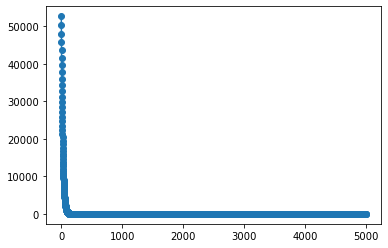

In [216]:
plt.plot(loss[10:], 'o-')

#### Plot data and curve-fit

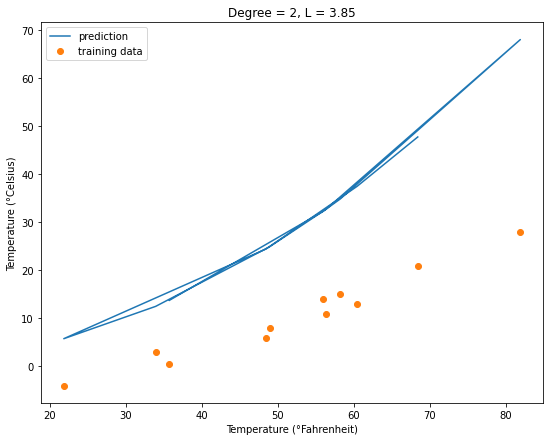

In [217]:
#fig = plt.figure(dpi=200)
plt.figure(figsize=(9,7))
plt.plot(t_u.numpy(), tp.detach().numpy(), label='prediction') # <2>
plt.plot(t_u.numpy(), t_c.numpy(), 'o', label='training data')
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.title('Degree = 2, L = 3.85')
plt.legend()

### Case2. Degree = 3

In [199]:
def model(zu, param):
    pred = torch.mv(zu, param[:-1]) + param[-1]
    return pred

In [200]:
param = torch.tensor([0,1,1,1.], requires_grad=True)
param

tensor([0., 1., 1., 1.], requires_grad=True)

In [201]:
zu3 = polynomial_feature(t_u/10., deg=3)

x_in:  torch.Size([11])


In [202]:
zu3
print('zu3: ', zu3, zu3.shape)

zu3:  tensor([[  3.5700,  12.7449,  45.4993],
        [  5.5900,  31.2481, 174.6769],
        [  5.8200,  33.8724, 197.1374],
        [  8.1900,  67.0761, 549.3534],
        [  5.6300,  31.6969, 178.4536],
        [  4.8900,  23.9121, 116.9302],
        [  3.3900,  11.4921,  38.9582],
        [  2.1800,   4.7524,  10.3602],
        [  4.8400,  23.4256, 113.3799],
        [  6.0400,  36.4816, 220.3489],
        [  6.8400,  46.7856, 320.0135]]) torch.Size([11, 3])


In [203]:
def loss_fn(t_p, t_c): 
    squared_diffs = (t_p - t_c)**2
    res = squared_diffs.mean()
    return res

In [204]:
param

tensor([0., 1., 1., 1.], requires_grad=True)

In [205]:
tp3 = model(zu3, param)
loss = loss_fn(tp, t_c)
loss.backward(retain_graph=True) # gradient

optimizer.step() # Gradient Descent

params, params.grad

(tensor([-1.3481,  0.6127, -0.2467], requires_grad=True),
 tensor([ 0.6447, -0.1162,  0.5780]))

In [206]:
params = torch.tensor([0,9,0,0.], requires_grad=True)

learning_rate = 1e-5
# optimizer = optim.Adam([params], lr=learning_rate) # <1>
optimizer = optim.SGD([params], lr=learning_rate) # <1>

params, loss = training_loop(5000,
             optimizer,
             params,
             zu3,
             t_c)

Epoch 500, Loss 1253.658081
Epoch 1000, Loss 507.143860
Epoch 1500, Loss 206.044083
Epoch 2000, Loss 84.598114
Epoch 2500, Loss 35.613518
Epoch 3000, Loss 15.854932
Epoch 3500, Loss 7.884386
Epoch 4000, Loss 4.668403
Epoch 4500, Loss 3.370139
Epoch 5000, Loss 2.845347


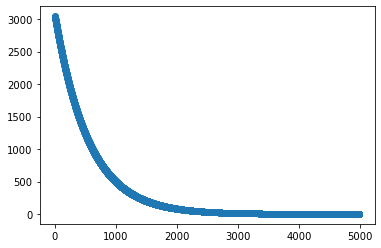

In [207]:
plt.plot(loss[10:], 'o-')

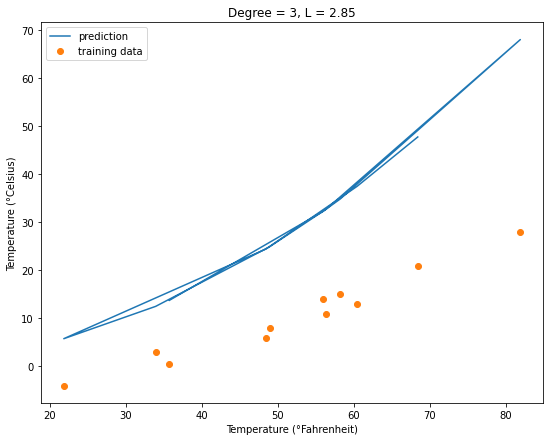

In [208]:
#fig = plt.figure(dpi=200)
plt.figure(figsize=(9,7))
plt.plot(t_u.numpy(), tp.detach().numpy(), label='prediction') # <2>
plt.plot(t_u.numpy(), t_c.numpy(), 'o', label='training data')
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.title('Degree = 3, L = 2.85')
plt.legend()

### Case3. Degree = 11

In [218]:
param = torch.tensor([0,1,1,1,1,1,1,1,1,1,1,1.], requires_grad=True)
param

tensor([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], requires_grad=True)

In [219]:
zu11 = polynomial_feature(t_u/10., deg=11)

x_in:  torch.Size([11])


In [220]:
zu11
print('zu11: ', zu11, zu11.shape)

zu11:  tensor([[3.5700e+00, 1.2745e+01, 4.5499e+01, 1.6243e+02, 5.7988e+02, 2.0702e+03,
         7.3906e+03, 2.6384e+04, 9.4192e+04, 3.3627e+05, 1.2005e+06],
        [5.5900e+00, 3.1248e+01, 1.7468e+02, 9.7644e+02, 5.4583e+03, 3.0512e+04,
         1.7056e+05, 9.5344e+05, 5.3297e+06, 2.9793e+07, 1.6654e+08],
        [5.8200e+00, 3.3872e+01, 1.9714e+02, 1.1473e+03, 6.6775e+03, 3.8863e+04,
         2.2618e+05, 1.3164e+06, 7.6614e+06, 4.4589e+07, 2.5951e+08],
        [8.1900e+00, 6.7076e+01, 5.4935e+02, 4.4992e+03, 3.6848e+04, 3.0179e+05,
         2.4717e+06, 2.0243e+07, 1.6579e+08, 1.3578e+09, 1.1120e+10],
        [5.6300e+00, 3.1697e+01, 1.7845e+02, 1.0047e+03, 5.6564e+03, 3.1846e+04,
         1.7929e+05, 1.0094e+06, 5.6830e+06, 3.1995e+07, 1.8013e+08],
        [4.8900e+00, 2.3912e+01, 1.1693e+02, 5.7179e+02, 2.7960e+03, 1.3673e+04,
         6.6859e+04, 3.2694e+05, 1.5987e+06, 7.8179e+06, 3.8229e+07],
        [3.3900e+00, 1.1492e+01, 3.8958e+01, 1.3207e+02, 4.4771e+02, 1.5177e+03,
      

In [221]:
tp11 = model(zu11, param)
loss = loss_fn(tp, t_c)
loss.backward() # gradient

optimizer.step() # Gradient Descent

params, params.grad

(tensor([-1.3481,  0.6127, -0.2467], requires_grad=True),
 tensor([ 0.6447, -0.1162,  0.5780]))

In [222]:
params = torch.tensor([0,9,0,0.], requires_grad=True)

learning_rate = 1e-5
# optimizer = optim.Adam([params], lr=learning_rate) # <1>
optimizer = optim.SGD([params], lr=learning_rate) # <1>

params, loss = training_loop(5000,
             optimizer,
             params,
             zu3,
             t_c)

Epoch 500, Loss 1253.658081
Epoch 1000, Loss 507.143860
Epoch 1500, Loss 206.044083
Epoch 2000, Loss 84.598114
Epoch 2500, Loss 35.613518
Epoch 3000, Loss 15.854932
Epoch 3500, Loss 7.884386
Epoch 4000, Loss 4.668403
Epoch 4500, Loss 3.370139
Epoch 5000, Loss 2.845347


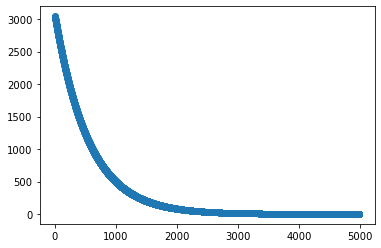

In [223]:
plt.plot(loss[10:], 'o-')

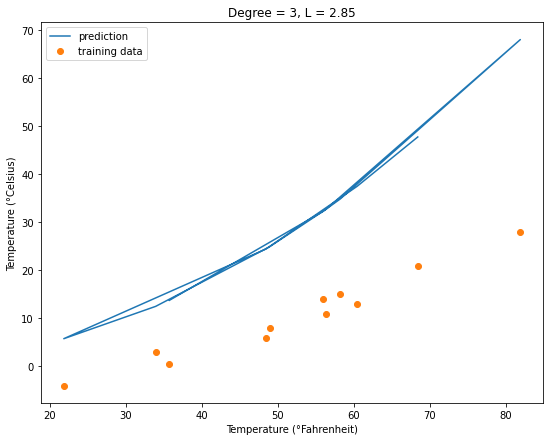

In [224]:
#fig = plt.figure(dpi=200)
plt.figure(figsize=(9,7))
plt.plot(t_u.numpy(), tp.detach().numpy(), label='prediction') # <2>
plt.plot(t_u.numpy(), t_c.numpy(), 'o', label='training data')
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.title('Degree = 3, L = 2.85')
plt.legend()